## Exercise 3: Multiclass classification using an MLP model
### Georgios Tsoumplekas
### AEM: 9359

### Imports

In [1]:
import tensorflow as tf

from tensorflow.keras import models,layers
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils  

import keras_tuner as kt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import numpy as np
import time

import matplotlib.pyplot as plt

In [2]:
#MNIST dataset parameters
num_classes = 10 #total classes: digits 0-9
num_features = 784 #data features (28x28 pixels image)

### Preprocessing of the MNIST dataset

In [3]:
#Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train shape", x_train.shape) 
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

#Convert to float32
x_train, x_test = np.array(x_train, dtype=np.float32), np.array(x_test, dtype=np.float32)

#Flatten image to 1-D vector
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

#Normalize to [0,1]
x_train, x_test = x_train/255, x_test/255

#True output on the test set (needed to create confusion matrix later)
y_test_raw = y_test

#One-hot encoding (to increase performance)
y_train, y_test = np_utils.to_categorical(y_train, num_classes), np_utils.to_categorical(y_test, num_classes)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


## Part 1: Comparison of different MLP models

### Model 1: Default settings

In [4]:
model_1 = models.Sequential()

#1st hidden layer: 128 neurons
model_1.add(layers.Dense(128, input_shape=(num_features,), activation='relu'))

#2nd hidden layer: 256 neurons
model_1.add(layers.Dense(256, activation='relu'))

#Output layer   
model_1.add(layers.Dense(10))

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


#### Case 1: Online learning

Epoch 1/100
48000/48000 [==============================] - 140s 3ms/step - loss: 0.5386 - accuracy: 0.9216 - val_loss: 0.5222 - val_accuracy: 0.9508
Epoch 2/100
48000/48000 [==============================] - 141s 3ms/step - loss: 0.5256 - accuracy: 0.9523 - val_loss: 0.5058 - val_accuracy: 0.9605
Epoch 3/100
48000/48000 [==============================] - 128s 3ms/step - loss: 0.5013 - accuracy: 0.9604 - val_loss: 0.7118 - val_accuracy: 0.9560
Epoch 4/100
48000/48000 [==============================] - 120s 3ms/step - loss: 0.5052 - accuracy: 0.9652 - val_loss: 0.4702 - val_accuracy: 0.9682
Epoch 5/100
48000/48000 [==============================] - 120s 3ms/step - loss: 0.4725 - accuracy: 0.9686 - val_loss: 0.6691 - val_accuracy: 0.9646
Epoch 6/100
48000/48000 [==============================] - 120s 3ms/step - loss: 0.4555 - accuracy: 0.9714 - val_loss: 0.8549 - val_accuracy: 0.9646
Epoch 7/100
48000/48000 [==============================] - 120s 3ms/step - loss: 0.4517 - accuracy: 0.9731

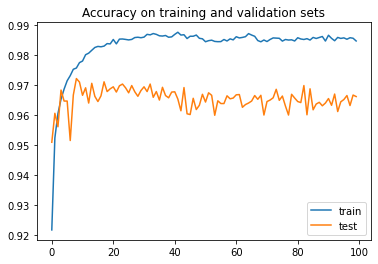

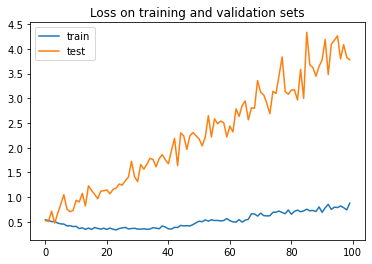

In [5]:
#Build model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

start = time.time()

#Train model
history = model_1.fit(x_train, y_train, epochs=100, batch_size=1, validation_split=0.2, verbose=1)

end = time.time()
print("Training time: {}s".format(end-start))

plt.figure(1)
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.title('Accuracy on training and validation sets')
plt.show()

plt.figure(2)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.title('Loss on training and validation sets')
plt.show()

#### Case 2: Minibatch learning

Epoch 1/100
188/188 [==============================] - 2s 6ms/step - loss: 0.2608 - accuracy: 0.9932 - val_loss: 3.1337 - val_accuracy: 0.9700
Epoch 2/100
188/188 [==============================] - 1s 6ms/step - loss: 0.1283 - accuracy: 0.9956 - val_loss: 3.1907 - val_accuracy: 0.9714
Epoch 3/100
188/188 [==============================] - 1s 6ms/step - loss: 0.1179 - accuracy: 0.9964 - val_loss: 3.3092 - val_accuracy: 0.9691
Epoch 4/100
188/188 [==============================] - 1s 6ms/step - loss: 0.0940 - accuracy: 0.9966 - val_loss: 3.4397 - val_accuracy: 0.9700
Epoch 5/100
188/188 [==============================] - 1s 6ms/step - loss: 0.0690 - accuracy: 0.9975 - val_loss: 3.1652 - val_accuracy: 0.9702
Epoch 6/100
188/188 [==============================] - 1s 6ms/step - loss: 0.0600 - accuracy: 0.9974 - val_loss: 3.1672 - val_accuracy: 0.9694
Epoch 7/100
188/188 [==============================] - 1s 6ms/step - loss: 0.0615 - accuracy: 0.9978 - val_loss: 3.2332 - val_accuracy: 0.9696

Epoch 58/100
188/188 [==============================] - 1s 6ms/step - loss: 0.0106 - accuracy: 0.9996 - val_loss: 3.1990 - val_accuracy: 0.9728
Epoch 59/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0101 - accuracy: 0.9994 - val_loss: 3.2075 - val_accuracy: 0.9718
Epoch 60/100
188/188 [==============================] - 1s 6ms/step - loss: 0.0118 - accuracy: 0.9993 - val_loss: 3.2356 - val_accuracy: 0.9706
Epoch 61/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0116 - accuracy: 0.9993 - val_loss: 3.2848 - val_accuracy: 0.9708
Epoch 62/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0031 - accuracy: 0.9998 - val_loss: 3.2413 - val_accuracy: 0.9705
Epoch 63/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0137 - accuracy: 0.9994 - val_loss: 3.4436 - val_accuracy: 0.9704
Epoch 64/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0070 - accuracy: 0.9996 - val_loss: 3.4379 - val_accuracy:

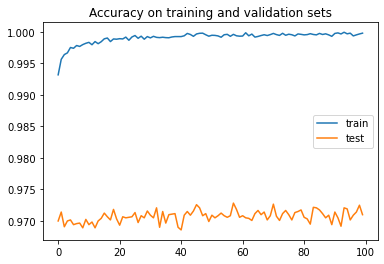

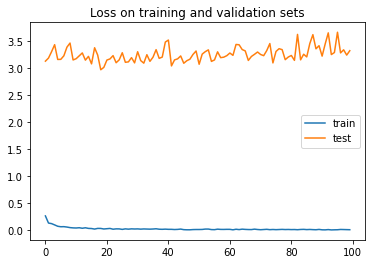

In [6]:
#Build model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

start = time.time()

#Train model
history = model_1.fit(x_train, y_train, epochs=100, batch_size=256, validation_split=0.2, verbose=1)

end = time.time()
print("Training time: {}s".format(end-start))

plt.figure(3)
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.title('Accuracy on training and validation sets')
plt.show()

plt.figure(4)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.title('Loss on training and validation sets')
plt.show()

#### Case 3: Batch learning

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.0013 - accuracy: 0.9999 - val_loss: 4.1291 - val_accuracy: 0.9678
Epoch 2/100
1/1 [==============================] - 0s 493ms/step - loss: 0.1133 - accuracy: 0.9953 - val_loss: 3.5206 - val_accuracy: 0.9672
Epoch 3/100
1/1 [==============================] - 1s 518ms/step - loss: 0.0208 - accuracy: 0.9985 - val_loss: 3.1812 - val_accuracy: 0.9714
Epoch 4/100
1/1 [==============================] - 0s 493ms/step - loss: 6.2781e-04 - accuracy: 1.0000 - val_loss: 3.1769 - val_accuracy: 0.9715
Epoch 5/100
1/1 [==============================] - 0s 494ms/step - loss: 6.9602e-05 - accuracy: 1.0000 - val_loss: 3.1752 - val_accuracy: 0.9718
Epoch 6/100
1/1 [==============================] - 0s 484ms/step - loss: 1.5075e-09 - accuracy: 1.0000 - val_loss: 3.1752 - val_accuracy: 0.9718
Epoch 7/100
1/1 [==============================] - 1s 503ms/step - loss: 1.5075e-09 - accuracy: 1.0000 - val_loss: 3.1752 - val_accuracy: 0.9718


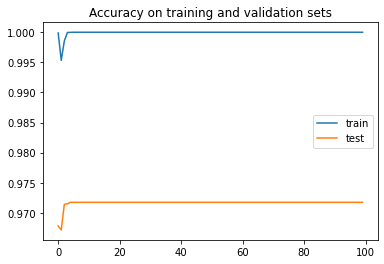

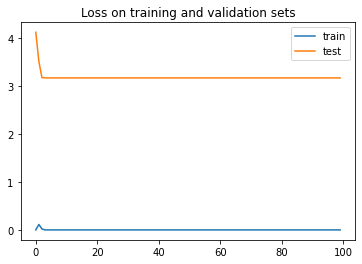

In [7]:
#Build model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

n_train = int(0.8*60000)


start = time.time()

#Train model
history = model_1.fit(x_train, y_train, epochs=100, batch_size=n_train, validation_split=0.2, verbose=1)

end = time.time()
print("Training time: {}s".format(end-start))

plt.figure(5)
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.title('Accuracy on training and validation sets')
plt.show()

plt.figure(6)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.title('Loss on training and validation sets')
plt.show()

#### Case 4: RMSProp optimizer, ρ=0.01

Epoch 1/100
188/188 [==============================] - 2s 6ms/step - loss: 6.1591e-10 - accuracy: 1.0000 - val_loss: 3.1664 - val_accuracy: 0.9722
Epoch 2/100
188/188 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.1661 - val_accuracy: 0.9722
Epoch 3/100
188/188 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.1658 - val_accuracy: 0.9722
Epoch 4/100
188/188 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.1657 - val_accuracy: 0.9722
Epoch 5/100
188/188 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.1655 - val_accuracy: 0.9722
Epoch 6/100
188/188 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.1654 - val_accuracy: 0.9722
Epoch 7/100
188/188 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3

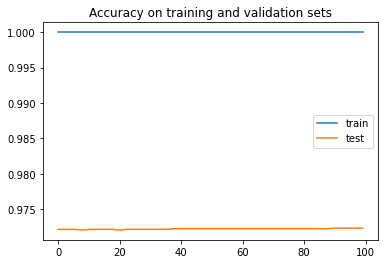

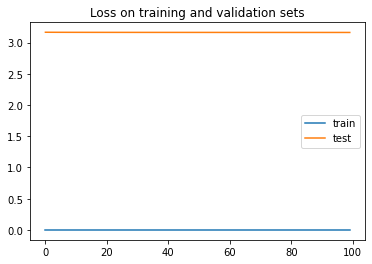

In [8]:
#Build model
model_1.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.01),
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

start = time.time()

#Train model
history = model_1.fit(x_train, y_train, epochs=100, batch_size=256, validation_split=0.2, verbose=1)

end = time.time()
print("Training time: {}s".format(end-start))

plt.figure(7)
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.title('Accuracy on training and validation sets')
plt.show()

plt.figure(8)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.title('Loss on training and validation sets')
plt.show()

#### Case 5: RMSProp optimizer, ρ=0.99

Epoch 1/100
188/188 [==============================] - 2s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.1631 - val_accuracy: 0.9723
Epoch 2/100
188/188 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.1631 - val_accuracy: 0.9723
Epoch 3/100
188/188 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.1631 - val_accuracy: 0.9723
Epoch 4/100
188/188 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.1631 - val_accuracy: 0.9723
Epoch 5/100
188/188 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.1630 - val_accuracy: 0.9723
Epoch 6/100
188/188 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.1630 - val_accuracy: 0.9723
Epoch 7/100
188/188 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3

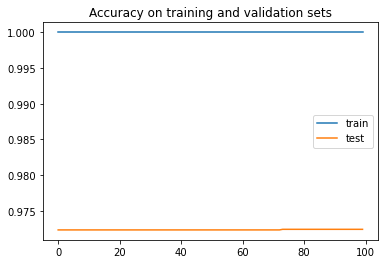

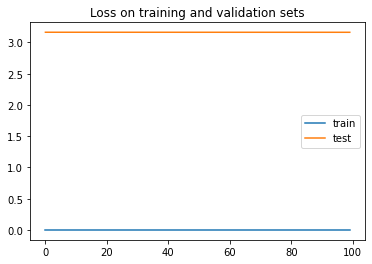

In [9]:
#Build model
model_1.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.99),
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

start = time.time()

#Train model
history = model_1.fit(x_train, y_train, epochs=100, batch_size=256, validation_split=0.2, verbose=1)

end = time.time()
print("Training time: {}s".format(end-start))

plt.figure(9)
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.title('Accuracy on training and validation sets')
plt.show()

plt.figure(10)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.title('Loss on training and validation sets')
plt.show()

### Model 2: Weight initialization from normal distribution with non-zero mean 

In [10]:
model_2 = models.Sequential()

#1st hidden layer: 128 neurons
model_2.add(layers.Dense(128, input_shape=(num_features,), activation='relu',
                         kernel_initializer=initializers.RandomNormal(mean=10)))

#2nd hidden layer: 256 neurons
model_2.add(layers.Dense(256, activation='relu',
                         kernel_initializer=initializers.RandomNormal(mean=10)))

#Output layer   
model_2.add(layers.Dense(10, kernel_initializer=initializers.RandomNormal(mean=10)))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


#### Case 6: SGD optimizer

Epoch 1/100
188/188 [==============================] - 2s 7ms/step - loss: 3695344384.0000 - accuracy: 0.1130 - val_loss: 2.3023 - val_accuracy: 0.1060
Epoch 2/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3019 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 3/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3016 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 4/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 5/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3013 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 6/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 7/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3011 - accuracy: 0.1140 - val_loss: 2.3019 - val_accurac

Epoch 58/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 59/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 60/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 61/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 62/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 63/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 64/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy:

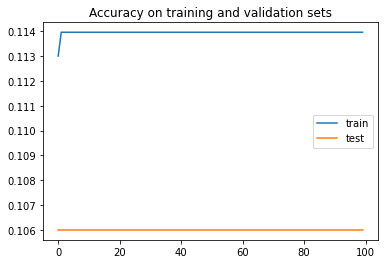

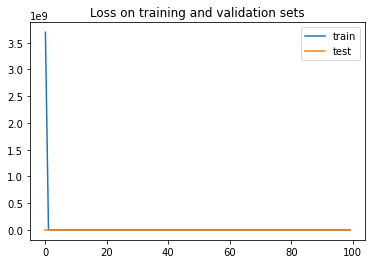

In [11]:
#Build model
model_2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

start = time.time()

#Train model
history = model_2.fit(x_train, y_train, epochs=100, batch_size=256, validation_split=0.2, verbose=1)

end = time.time()
print("Training time: {}s".format(end-start))

plt.figure(11)
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.title('Accuracy on training and validation sets')
plt.show()

plt.figure(12)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.title('Loss on training and validation sets')
plt.show()

### Model 3: L2-regularization and weight initialization from normal distribution with non-zero mean

In [12]:
a = 0.1

model_3 = models.Sequential()

#1st hidden layer: 128 neurons
model_3.add(layers.Dense(128, input_shape=(num_features,), activation='relu',
                         kernel_regularizer=regularizers.l2(a),
                            kernel_initializer=initializers.RandomNormal(mean=10)))

#2nd hidden layer: 256 neurons
model_3.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(a),
                            kernel_initializer=initializers.RandomNormal(mean=10)))

#Output layer   
model_3.add(layers.Dense(10, kernel_regularizer=regularizers.l2(a),
                            kernel_initializer=initializers.RandomNormal(mean=10)))

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


#### Case 7: a=0.1

Epoch 1/100
188/188 [==============================] - 2s 6ms/step - loss: 918295412736.0000 - accuracy: 0.1069 - val_loss: 621750976512.0000 - val_accuracy: 0.1060
Epoch 2/100
188/188 [==============================] - 1s 5ms/step - loss: 438140174336.0000 - accuracy: 0.1140 - val_loss: 292886937600.0000 - val_accuracy: 0.1060
Epoch 3/100
188/188 [==============================] - 1s 5ms/step - loss: 206393786368.0000 - accuracy: 0.1140 - val_loss: 137969582080.0000 - val_accuracy: 0.1060
Epoch 4/100
188/188 [==============================] - 1s 5ms/step - loss: 97225506816.0000 - accuracy: 0.1140 - val_loss: 64993095680.0000 - val_accuracy: 0.1060
Epoch 5/100
188/188 [==============================] - 1s 6ms/step - loss: 45799821312.0000 - accuracy: 0.1140 - val_loss: 30616152064.0000 - val_accuracy: 0.1060
Epoch 6/100
188/188 [==============================] - 1s 6ms/step - loss: 21574813696.0000 - accuracy: 0.1140 - val_loss: 14422285312.0000 - val_accuracy: 0.1060
Epoch 7/100
188/

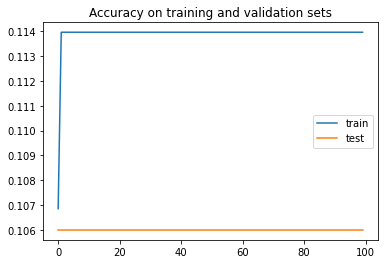

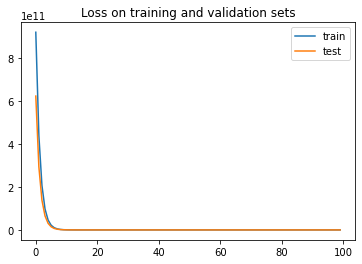

In [13]:
#Build model
model_3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

start = time.time()

#Train model
history = model_3.fit(x_train, y_train, epochs=100, batch_size=256, validation_split=0.2, verbose=1)

end = time.time()
print("Training time: {}s".format(end-start))

plt.figure(13)
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.title('Accuracy on training and validation sets')
plt.show()

plt.figure(14)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.title('Loss on training and validation sets')
plt.show()

#### Case 8: a=0.01

Epoch 1/100
188/188 [==============================] - 2s 6ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 2/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 3/100
188/188 [==============================] - 1s 6ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 4/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 5/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 6/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 7/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060

Epoch 58/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 59/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 60/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 61/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 62/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 63/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 64/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy:

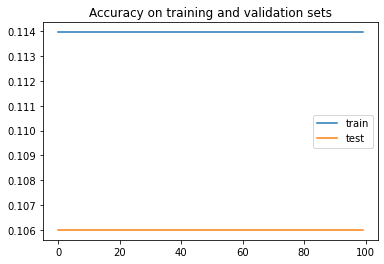

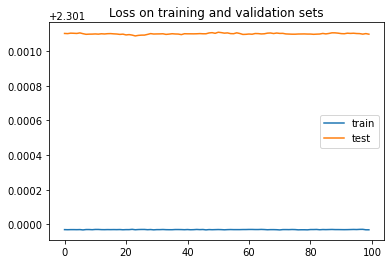

In [14]:
a=0.01

#Build model
model_3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

start = time.time()

#Train model
history = model_3.fit(x_train, y_train, epochs=100, batch_size=256, validation_split=0.2, verbose=1)

end = time.time()
print("Training time: {}s".format(end-start))

plt.figure(15)
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.title('Accuracy on training and validation sets')
plt.show()

plt.figure(16)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.title('Loss on training and validation sets')
plt.show()

#### Case 9: a=0.001

Epoch 1/100
188/188 [==============================] - 2s 6ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 2/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 3/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 4/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 5/100
188/188 [==============================] - 1s 6ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 6/100
188/188 [==============================] - 1s 6ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 7/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060

Epoch 58/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 59/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 60/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 61/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 62/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 63/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 64/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy:

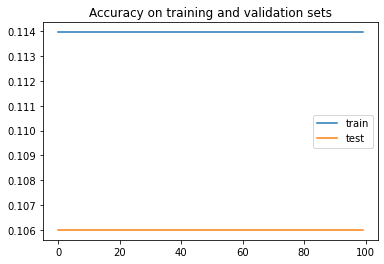

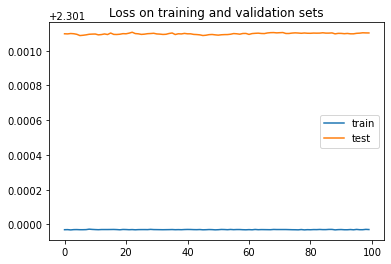

In [15]:
a=0.001

#Build model
model_3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

start = time.time()

#Train model
history = model_3.fit(x_train, y_train, epochs=100, batch_size=256, validation_split=0.2, verbose=1)

end = time.time()
print("Training time: {}s".format(end-start))

plt.figure(17)
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.title('Accuracy on training and validation sets')
plt.show()

plt.figure(18)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.title('Loss on training and validation sets')
plt.show()

### Model 4: L1-regularization and dropout

In [28]:
model_4 = models.Sequential()

#1st hidden layer: 128 neurons
model_4.add(layers.Dense(128, input_shape=(num_features,), activation='relu',
                         kernel_regularizer=regularizers.l1(0.01)))
model_4.add(layers.Dropout(0.3))

#2nd hidden layer: 256 neurons
model_4.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model_4.add(layers.Dropout(0.3))

#Output layer   
model_4.add(layers.Dense(10))

model_4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


#### Case 10: Default minibatch learning

Epoch 1/100
188/188 [==============================] - 2s 9ms/step - loss: 10.9965 - accuracy: 0.2841 - val_loss: 2.6423 - val_accuracy: 0.4269
Epoch 2/100
188/188 [==============================] - 2s 9ms/step - loss: 2.7141 - accuracy: 0.3375 - val_loss: 2.4698 - val_accuracy: 0.5190
Epoch 3/100
188/188 [==============================] - 2s 8ms/step - loss: 2.6285 - accuracy: 0.3706 - val_loss: 2.3675 - val_accuracy: 0.5749
Epoch 4/100
188/188 [==============================] - 2s 9ms/step - loss: 2.5805 - accuracy: 0.3873 - val_loss: 2.2900 - val_accuracy: 0.6130
Epoch 5/100
188/188 [==============================] - 2s 9ms/step - loss: 2.5561 - accuracy: 0.3988 - val_loss: 2.2563 - val_accuracy: 0.6359
Epoch 6/100
188/188 [==============================] - 2s 10ms/step - loss: 2.5346 - accuracy: 0.4076 - val_loss: 2.2468 - val_accuracy: 0.6311
Epoch 7/100
188/188 [==============================] - 2s 9ms/step - loss: 2.5210 - accuracy: 0.4136 - val_loss: 2.2510 - val_accuracy: 0.61

Epoch 58/100
188/188 [==============================] - 2s 10ms/step - loss: 2.3426 - accuracy: 0.4597 - val_loss: 2.1539 - val_accuracy: 0.5913
Epoch 59/100
188/188 [==============================] - 2s 8ms/step - loss: 2.3486 - accuracy: 0.4579 - val_loss: 2.0170 - val_accuracy: 0.6738
Epoch 60/100
188/188 [==============================] - 2s 8ms/step - loss: 2.3420 - accuracy: 0.4629 - val_loss: 2.0558 - val_accuracy: 0.6415
Epoch 61/100
188/188 [==============================] - 2s 8ms/step - loss: 2.3474 - accuracy: 0.4585 - val_loss: 2.0488 - val_accuracy: 0.6669
Epoch 62/100
188/188 [==============================] - 2s 8ms/step - loss: 2.3401 - accuracy: 0.4604 - val_loss: 1.9721 - val_accuracy: 0.6922
Epoch 63/100
188/188 [==============================] - 2s 8ms/step - loss: 2.3435 - accuracy: 0.4562 - val_loss: 2.0513 - val_accuracy: 0.6895
Epoch 64/100
188/188 [==============================] - 2s 8ms/step - loss: 2.3437 - accuracy: 0.4575 - val_loss: 2.0217 - val_accuracy

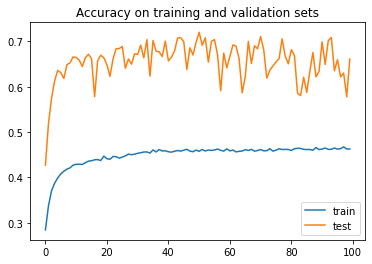

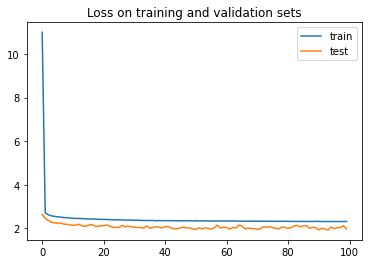

In [29]:
#Build model
model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

start = time.time()

#Train model
history = model_4.fit(x_train, y_train, epochs=100, batch_size=256, validation_split=0.2, verbose=1)

end = time.time()
print("Training time: {}s".format(end-start))

plt.figure(19)
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.title('Accuracy on training and validation sets')
plt.show()

plt.figure(20)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.title('Loss on training and validation sets')
plt.show()

## Part 2: Fine tuning of a selected model

### Import add-on for F-measure

In [30]:
!pip install tensorflow-addons

import tensorflow_addons as tfa

### Define the hyper-model

In [31]:
def model_builder(hp):
    model = models.Sequential()
    
    #Parameter a of L2-regularization to be learned by the hypermodel
    hp_a = hp.Choice('a', values = [1e-1, 1e-3, 1e-6])
    
    #Number of neurons in the 1st layer is either 64 or 128
    hp_units_1 = hp.Choice('units_1', values = [64, 128])
    model.add(layers.Dense(units = hp_units_1, input_shape = (num_features,), activation = 'relu',
                             kernel_regularizer = regularizers.l2(l2=hp_a),
                             kernel_initializer = initializers.HeNormal()))
    
    #Number of neurons in the 2nd layer is either 256 or 512
    hp_units_2 = hp.Choice('units_2', values = [256, 512])
    model.add(layers.Dense(units = hp_units_2, activation = 'relu',
                             kernel_regularizer = regularizers.l2(l2=hp_a),
                             kernel_initializer = initializers.HeNormal()))
    
    #Output layer
    model.add(layers.Dense(10, kernel_regularizer = regularizers.l2(l2=hp_a),
                            kernel_initializer = initializers.HeNormal()))
    
    #Learning rate of RMSprop to be learned by the hypermodel
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-1, 1e-2, 1e-3])
    
    #Build model
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate = hp_learning_rate),
                    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                    metrics=[tfa.metrics.F1Score(10,'macro')])
    
    return model

###  Find hyperparameters using Hyperband tuner

In [32]:
#Instantiate tuner
tuner = kt.Hyperband(model_builder,
                      objective = kt.Objective('val_f1_score', direction = 'max'),
                      max_epochs = 1000,
                      factor = 3)

In [33]:
#Early stopping
stop_early = tf.keras.callbacks.EarlyStopping(monitor = 'val_f1_score',
                                              mode = 'max',
                                              patience = 200,
                                              verbose=1)

In [34]:
#Search for the optimal hyperparameters
tuner.search(x_train, y_train, epochs = 1000, validation_split = 0.2, callbacks = [stop_early])

#Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Optimal number of neurons in 1st layer: {}".format(best_hps.get('units_1')))
print("Optimal number of neurons in 2nd layer: {}".format(best_hps.get('units_2')))
print("Optimal value of a for L2-regularization: {}".format(best_hps.get('a')))
print("Optimal value of learning rate: {}".format(best_hps.get('learning_rate')))

Trial 34 Complete [00h 00m 16s]
val_f1_score: 0.9698039889335632

Best val_f1_score So Far: 0.9698039889335632
Total elapsed time: 00h 08m 01s
INFO:tensorflow:Oracle triggered exit
Optimal numberof neurons in 1st layer: 128
Optimal number of neurons in 2nd layer: 512
Optimal value of a for L2-regularization: 1e-06
Optimal value of learning rate: 0.001


### Train the optimal model

Epoch 1/1000
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2351 - f1_score: 0.9297 - val_loss: 0.1317 - val_f1_score: 0.9611
Epoch 2/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1073 - f1_score: 0.9687 - val_loss: 0.1154 - val_f1_score: 0.9679
Epoch 3/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0803 - f1_score: 0.9777 - val_loss: 0.1128 - val_f1_score: 0.9724
Epoch 4/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0634 - f1_score: 0.9824 - val_loss: 0.1302 - val_f1_score: 0.9725
Epoch 5/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0546 - f1_score: 0.9849 - val_loss: 0.1254 - val_f1_score: 0.9732
Epoch 6/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0466 - f1_score: 0.9875 - val_loss: 0.1285 - val_f1_score: 0.9744
Epoch 7/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0434 - f1_score: 0.9885 - val_loss: 0.1358 -

Epoch 57/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0131 - f1_score: 0.9970 - val_loss: 0.1927 - val_f1_score: 0.9745
Epoch 58/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0128 - f1_score: 0.9971 - val_loss: 0.1890 - val_f1_score: 0.9762
Epoch 59/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0132 - f1_score: 0.9967 - val_loss: 0.1788 - val_f1_score: 0.9762
Epoch 60/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0112 - f1_score: 0.9968 - val_loss: 0.1830 - val_f1_score: 0.9770
Epoch 61/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0112 - f1_score: 0.9970 - val_loss: 0.1992 - val_f1_score: 0.9760
Epoch 62/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0104 - f1_score: 0.9972 - val_loss: 0.1774 - val_f1_score: 0.9781
Epoch 63/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0120 - f1_score: 0.9971 - val_loss: 0

1500/1500 [==============================] - 6s 4ms/step - loss: 0.0085 - f1_score: 0.9981 - val_loss: 0.2221 - val_f1_score: 0.9728
Epoch 168/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0082 - f1_score: 0.9980 - val_loss: 0.2384 - val_f1_score: 0.9735
Epoch 169/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0100 - f1_score: 0.9977 - val_loss: 0.2258 - val_f1_score: 0.9736
Epoch 170/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0074 - f1_score: 0.9980 - val_loss: 0.2210 - val_f1_score: 0.9721
Epoch 171/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0096 - f1_score: 0.9972 - val_loss: 0.1982 - val_f1_score: 0.9757
Epoch 172/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0107 - f1_score: 0.9977 - val_loss: 0.2032 - val_f1_score: 0.9757
Epoch 173/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0097 - f1_score: 0.9978 - val_loss: 0.2774 - 

1500/1500 [==============================] - 6s 4ms/step - loss: 0.0110 - f1_score: 0.9979 - val_loss: 0.2671 - val_f1_score: 0.9715
Epoch 278/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0107 - f1_score: 0.9975 - val_loss: 0.2400 - val_f1_score: 0.9741
Epoch 279/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0093 - f1_score: 0.9978 - val_loss: 0.2227 - val_f1_score: 0.9736
Epoch 280/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0105 - f1_score: 0.9978 - val_loss: 0.3082 - val_f1_score: 0.9676
Epoch 281/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0099 - f1_score: 0.9975 - val_loss: 0.2497 - val_f1_score: 0.9736
Epoch 282/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0091 - f1_score: 0.9982 - val_loss: 0.2736 - val_f1_score: 0.9717
Epoch 283/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0095 - f1_score: 0.9978 - val_loss: 0.2522 - 

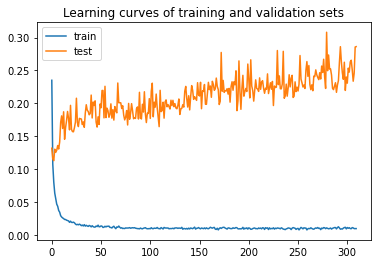

In [23]:
#Build model
model = tuner.hypermodel.build(best_hps)

#Train model
history = model.fit(x_train, y_train, epochs = 1000, validation_split = 0.2, callbacks = [stop_early])

plt.figure(21)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.title('Learning curves of training and validation sets')
plt.show()

### Predict on the test set using the trained model

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.94      0.98      0.96      1032
           3       0.98      0.95      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.99      0.95      0.97       892
           6       0.97      0.98      0.97       958
           7       0.96      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



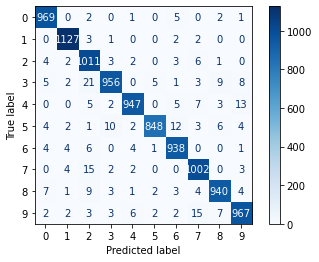

In [24]:
labels = [0,1,2,3,4,5,6,7,8,9]

#Predictions
y_pred = model.predict(x_test, verbose=1)

#Get the value of the predicted label
y_pred_bool = np.argmax(y_pred, axis=1)

#Create and display confusion matrix
M = confusion_matrix(y_test_raw, y_pred_bool)

disp = ConfusionMatrixDisplay(confusion_matrix=M, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show

#accuracy, precision, recall and f1-score
print(classification_report(y_test_raw, y_pred_bool))

### Example of 3 predictions using the trained model

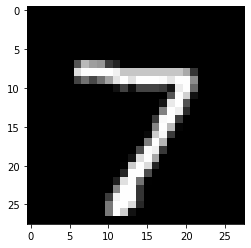

Model prediction: 7


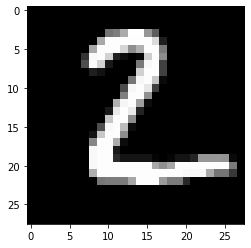

Model prediction: 2


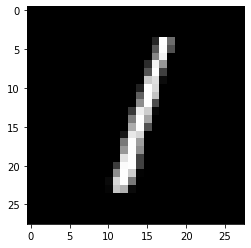

Model prediction: 1


In [25]:
n_images = 3
test_images = x_test[:n_images]
predictions = model.predict(test_images)

for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions[i]))